# Playing with temporospatial data and pytorch

In [30]:
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('~/Work/Cabodelgado_Mapping/Data/deforestData.csv')
df

,country,subnational1,subnational2,threshold,area_ha,extent_2000_ha,extent_2010_ha,biomass_stock_2000_Mt,avg_biomass_per_ha_Mt,Year,Biomass Loss,co2_stock_2000_Mt,CO2 Emissions,gain_2000_2012_ha,Tree Cover Loss
0,Mozambique,Cabo Delgado,Ancuabe,10,625605,602772,586662,63.93,0.0,2001,0.13,117.20,0.24,926,1052
1,Mozambique,Cabo Delgado,Ancuabe,10,625605,602772,586662,63.93,0.0,2002,0.09,117.20,0.17,926,780
2,Mozambique,Cabo Delgado,Ancuabe,10,625605,602772,586662,63.93,0.0,2003,0.18,117.20,0.33,926,1505
3,Mozambique,Cabo Delgado,Ancuabe,10,625605,602772,586662,63.93,0.0,2004,0.07,117.20,0.12,926,571
4,Mozambique,Cabo Delgado,Ancuabe,10,625605,602772,586662,63.93,0.0,2005,0.15,117.20,0.27,926,1207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16249,Mozambique,Zambezia,Pebane,75,1006199,23232,51422,4.51,0.0,2014,0.03,8.26,0.05,4028,144
16250,Mozambique,Zambezia,Pebane,75,1006199,23232,51422,4.51,0.0,2015,0.03,8.26,0.06,4028,165
16251,Mozambique,Zambezia,Pebane,75,1006199,23232,51422,4.51,0.0,2016,0.05,8.26,0.09,4028,265
16252,Mozambique,Zambezia,Pebane,75,1006199,23232,51422,4.51,0.0,2017,0.05,8.26,0.10,4028,291


In [4]:
# Filter a region of interest from the Subnational 1 column

df_roi = df.query('subnational1 == "Cabo Delgado"').drop(['country', 'subnational1'], axis = 1)
df_roi

,subnational2,threshold,area_ha,extent_2000_ha,extent_2010_ha,biomass_stock_2000_Mt,avg_biomass_per_ha_Mt,Year,Biomass Loss,co2_stock_2000_Mt,CO2 Emissions,gain_2000_2012_ha,Tree Cover Loss
0,Ancuabe,10,625605,602772,586662,63.93,0.0,2001,0.13,117.20,0.24,926,1052
1,Ancuabe,10,625605,602772,586662,63.93,0.0,2002,0.09,117.20,0.17,926,780
2,Ancuabe,10,625605,602772,586662,63.93,0.0,2003,0.18,117.20,0.33,926,1505
3,Ancuabe,10,625605,602772,586662,63.93,0.0,2004,0.07,117.20,0.12,926,571
4,Ancuabe,10,625605,602772,586662,63.93,0.0,2005,0.15,117.20,0.27,926,1207
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1885,Quissanga,75,167896,261,1146,0.05,0.0,2014,0.00,0.09,0.00,1689,2
1886,Quissanga,75,167896,261,1146,0.05,0.0,2015,0.00,0.09,0.00,1689,1
1887,Quissanga,75,167896,261,1146,0.05,0.0,2016,0.00,0.09,0.00,1689,2
1888,Quissanga,75,167896,261,1146,0.05,0.0,2017,0.00,0.09,0.00,1689,2


In [5]:
df_roi.describe()


,threshold,area_ha,extent_2000_ha,extent_2010_ha,biomass_stock_2000_Mt,avg_biomass_per_ha_Mt,Year,Biomass Loss,co2_stock_2000_Mt,CO2 Emissions,gain_2000_2012_ha,Tree Cover Loss
count,1890.000000,1.890000e+03,1.890000e+03,1.890000e+03,1890.000000,1890.0,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000
mean,32.142857,5.184912e+05,2.932756e+05,2.807481e+05,31.092095,0.0,2009.500000,0.149582,57.002762,0.274455,3159.666667,1238.515344
std,21.194746,4.206775e+05,3.109885e+05,2.963459e+05,28.953308,0.0,5.189501,0.193248,53.081797,0.353987,3528.163795,1591.495197
min,10.000000,5.145000e+04,3.000000e+00,0.000000e+00,0.000000,0.0,2001.000000,0.000000,0.000000,0.000000,31.000000,0.000000
25%,15.000000,2.014960e+05,4.396400e+04,4.646100e+04,4.940000,0.0,2005.000000,0.020000,9.060000,0.040000,124.000000,155.250000
50%,25.000000,4.737790e+05,2.297540e+05,2.099630e+05,27.140000,0.0,2009.500000,0.080000,49.750000,0.150000,1650.000000,696.500000
75%,50.000000,5.973080e+05,4.162560e+05,3.871380e+05,42.740000,0.0,2014.000000,0.200000,78.360000,0.360000,6181.000000,1643.000000
max,75.000000,1.775830e+06,1.700395e+06,1.654433e+06,138.430000,0.0,2018.000000,1.330000,253.790000,2.430000,11117.000000,10835.000000


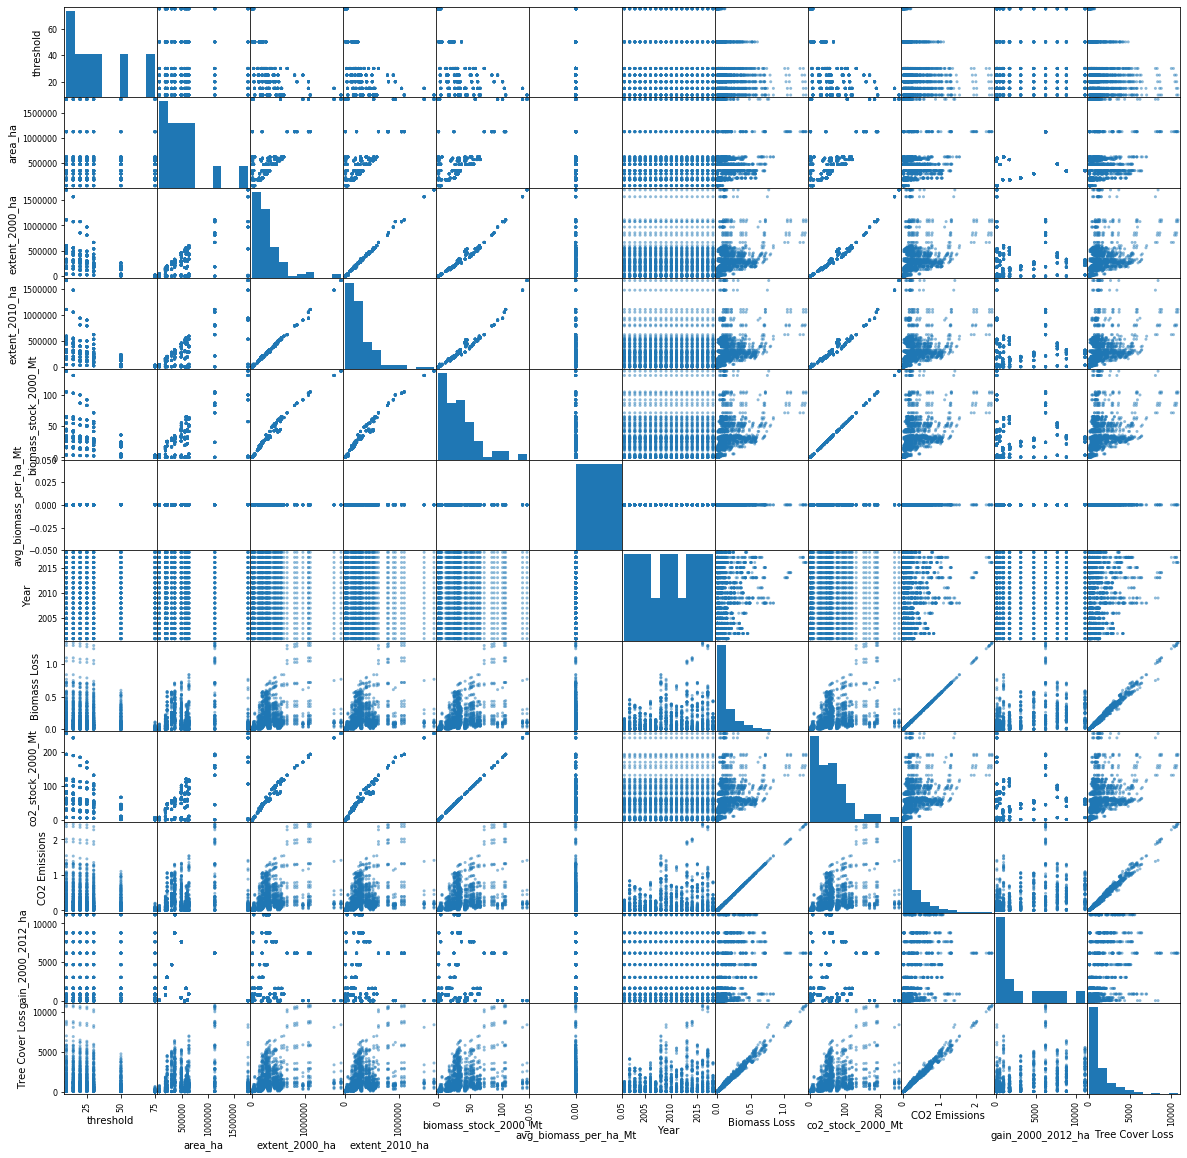

In [11]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
scatter_matrix(df_roi,figsize=(20,20))
plt.show()

In [18]:
# Make Train/Test split for model evaluation

label_enc = LabelEncoder()
y = label_enc.fit(df_roi['subnational2']).transform(df_roi['subnational2'])
X = df_roi.drop(['subnational2'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=88)


array([ 5, 12, 12, ...,  2,  3,  2])

In [23]:
# Preprocess the training and test X data

def tanhNorm(x, epsilon = 0.000001):
    mu = np.mean(x)
    sd = np.std(x)
    
    if sd == 0:
        print('Making correction for std. dev of 0, sd = epsilon')
        sd = epsilon
    
    return 0.5 * (np.tanh(0.01 * ((x - mu) / sd)) + 1)

    
clean_X_train = X_train.apply(tanhNorm)
clean_X_test = X_test.apply(tanhNorm)

clean_X_train

Making correction for std. dev of 0, sd = epsilon
Making correction for std. dev of 0, sd = epsilon


,threshold,area_ha,extent_2000_ha,extent_2010_ha,biomass_stock_2000_Mt,avg_biomass_per_ha_Mt,Year,Biomass Loss,co2_stock_2000_Mt,CO2 Emissions,gain_2000_2012_ha,Tree Cover Loss
639,0.494803,0.500521,0.504302,0.504692,0.505913,0.5,0.500441,0.498174,0.505913,0.498073,0.497919,0.497766
1567,0.498338,0.497971,0.499591,0.499720,0.499805,0.5,0.492726,0.507968,0.499805,0.508044,0.511287,0.509145
1581,0.498338,0.497971,0.499591,0.499720,0.499805,0.5,0.506228,0.506644,0.499805,0.506744,0.511287,0.507740
1167,0.495982,0.496227,0.498444,0.498559,0.499020,0.5,0.506228,0.509555,0.499020,0.509489,0.499921,0.508436
939,0.498338,0.514439,0.510779,0.510331,0.510570,0.5,0.494654,0.498703,0.510569,0.498651,0.495706,0.499065
...,...,...,...,...,...,...,...,...,...,...,...,...
613,0.510119,0.494491,0.495274,0.495242,0.494595,0.5,0.492726,0.496056,0.494596,0.496050,0.495759,0.496033
916,0.495982,0.514439,0.520338,0.520007,0.517313,0.5,0.507193,0.503997,0.517313,0.503998,0.495706,0.506816
362,0.510119,0.499377,0.495274,0.495243,0.494597,0.5,0.493690,0.496056,0.494596,0.496050,0.496228,0.496036
433,0.498338,0.499445,0.501664,0.501768,0.503445,0.5,0.492726,0.504527,0.503444,0.504576,0.506389,0.503199


In [24]:
print('X Training shape: ', clean_X_train.shape)
print('y Training shape: ', y_train.shape)
print('X Training shape: ', clean_X_test.shape)
print('X Training shape: ', y_test.shape)

X Training shape:  (1512, 12)
y Training shape:  (1512,)
X Training shape:  (378, 12)
X Training shape:  (378,)


In [33]:
## Naive Bayes classifier predicting subnational2 city label


gnb = GaussianNB()
y_pred = gnb.fit(clean_X_train, y_train).predict(clean_X_test)

print('Acc. :', accuracy_score(y_test, y_pred))
print('F1 score :', f1_score(y_test, y_pred, average='macro'))
print('MCC :', matthews_corrcoef(y_test, y_pred, sample_weight=None))

Acc. : 0.7962962962962963
F1 score : 0.7485838779956426
MCC : 0.7893434052865395
